In [1]:
import pandas as pd
import os
from random import randint
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sklearn
import tensorflow as tf

folderpath = r"D:\test_development\DHL\DHL Energy Breakdown\HKC - Measurement record/"

In [16]:
dfs = {}
for folder in os.listdir(folderpath):
    if not os.path.isdir(folderpath + folder):
        continue
    dfs[folder] = []
    for file in os.listdir(folderpath + folder):

        if not file.endswith('.xlsx'):
            continue

        try:
            file_df = pd.read_excel(os.path.join(folderpath, folder, file), skiprows=1)
        except:
            print(file)
            print('cannot open')
            continue
        
        wanted = pd.DataFrame()
        if('Time' in file_df):
            wanted['datetime'] = pd.to_datetime('22' + file_df['Time'].str[6:], format='%y/%m/%d/%H:%M')
        elif('时间' in file_df):
            wanted['datetime'] = pd.to_datetime('22' + file_df['时间'].str[6:], format='%y/%m/%d/%H:%M')
        else:
            print(file_df.columns)
            print('no time')
        
        if('kW' in file_df):
            wanted[file[:-5]] = file_df['kW']
        elif('kw' in file_df):
            wanted[file[:-5]] = file_df['kw']
        elif('Power(kW)' in file_df):
            wanted[file[:-5]] = file_df['Power(kW)']
        elif('power(kW)' in file_df):
            wanted[file[:-5]] = file_df['power(kW)']
        else:
            print(file_df.columns)
            print('no power')
        
        if file == 'LOG-33 9MAC.xlsx':
            wanted['datetime'] = wanted['datetime'] - pd.Timedelta(days = 10)
        
        wanted.set_index('datetime', inplace=True)
        dfs[folder].append(wanted[~wanted.index.duplicated(keep='first')])
        print(file)
        print('done')

def concatenate(dfs, range, num):
    df = pd.concat(dfs, axis=1)
    df.sort_index(inplace=True)
    df = df.resample('5T').mean()
    df = df.reindex(range)
    # df = df.interpolate(limit_direction='both', limit=3)
    return df.reset_index(names='date'+str(num))


df1 = concatenate(dfs['3-11NOV'], pd.date_range('2022-11-04', '2022-11-11', freq='5T')[:-1], 1)
df2 = concatenate(dfs['11-18NOV'], pd.date_range('2022-11-11', '2022-11-18', freq='5T')[:-1], 2)
df3 = concatenate(dfs['18-25NOV'], pd.date_range('2022-11-18', '2022-11-25', freq='5T')[:-1], 3)

LOG-02 AC3 in 10F.xlsx
done
LOG-03 AC4 in 9F.xlsx
done
LOG-04 conveyor in 9F.xlsx
done
LOG-07 AC2 in 10F.xlsx
done
LOG-09 AC2 in 9F.xlsx
done
LOG-13 AC4 in 10F.xlsx
done
LOG-27 AC1 in 10F.xlsx
done
LOG-29 AC3 in 9F.xlsx
done
LOG-33 9MAC.xlsx
done
LOG-43 10MAC.xlsx
done
LOG-46 AC1 in 9F.xlsx
done
LOG-39.xlsx
done
LOG-48.xlsx
done
LOG-50.xlsx
done
LOG-19 EVcharger2 in 10F.xlsx
done
LOG-22 LL3 in 10F.xlsx
done
LOG-23 LL3 in 9F.xlsx
done
LOG-24 LL1 in 9F.xlsx
done
LOG-25 LL4 in 10F.xlsx
done
LOG-28 LL2 in 9F.xlsx
done
LOG-3 LL1 in 10F.xlsx
done
LOG-31 LL4 in 9F.xlsx
done
LOG-37 conveyer in 10F.xlsx
done
LOG-40 LL2 in 10F.xlsx
done
LOG-42 EVcharger3 in 10F.xlsx
done
LOG-45 EVcharger1 in 10F.xlsx
done
LOG-51 EVcahrger in 9F.xlsx
done
~$LOG-3 LL1 in 10F.xlsx
cannot open


In [28]:
df = pd.concat([df1, df2, df3], axis=1)

df['time'] = df['date1'].dt.time
df['date1'] = df['date1'].dt.date
df['date2'] = df['date2'].dt.date
df['date3'] = df['date3'].dt.date
df.set_index('time', inplace=True)

df.rename(columns={
    "LOG-39": "LOG-39 M2 in 10F",
    "LOG-48": "LOG-48 M1 in 10F",
    "LOG-50": "LOG-50 M2 in 9F",
    'LOG-33 9MAC': 'LOG-33 MAC in 9F',
    'LOG-43 10MAC': 'LOG-43 MAC in 10F'
}, inplace=True)
df["LOG-33 M1 in 9F"] = df['LOG-33 MAC in 9F']

df.columns

Index(['date1', 'LOG-19 EVcharger2 in 10F', 'LOG-22 LL3 in 10F',
       'LOG-23 LL3 in 9F', 'LOG-24 LL1 in 9F', 'LOG-25 LL4 in 10F',
       'LOG-28 LL2 in 9F', 'LOG-3 LL1 in 10F', 'LOG-31 LL4 in 9F',
       'LOG-37 conveyer in 10F', 'LOG-40 LL2 in 10F',
       'LOG-42 EVcharger3 in 10F', 'LOG-45 EVcharger1 in 10F',
       'LOG-51 EVcahrger in 9F', 'date2', 'LOG-02 AC3 in 10F',
       'LOG-03 AC4 in 9F', 'LOG-04 conveyor in 9F', 'LOG-07 AC2 in 10F',
       'LOG-09 AC2 in 9F', 'LOG-13 AC4 in 10F', 'LOG-27 AC1 in 10F',
       'LOG-29 AC3 in 9F', 'LOG-33 MAC in 9F', 'LOG-43 MAC in 10F',
       'LOG-46 AC1 in 9F', 'date3', 'LOG-39 M2 in 10F', 'LOG-48 M1 in 10F',
       'LOG-50 M2 in 9F', 'LOG-33 M1 in 9F'],
      dtype='object')

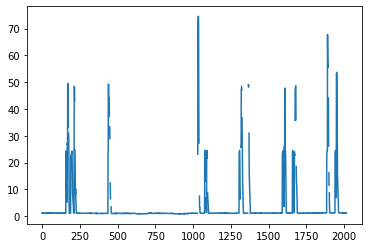

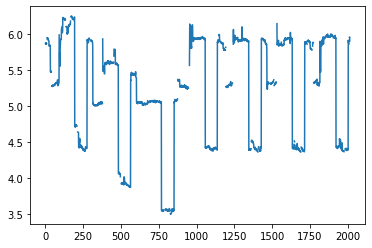

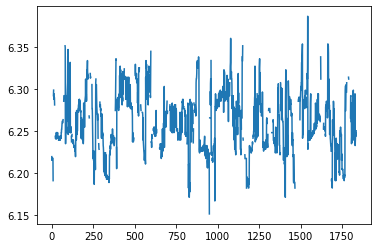

In [57]:
for col in df.columns[1:4]:
    plt.plot(df.reset_index(drop=True)[col])
    plt.show()

In [108]:
np.array(notnas.index).reshape([1, -1, 1]).shape

(1, 862, 1)

In [110]:
df_pre = df.reset_index(drop=True)
df_pre = df_pre.drop(columns = df_pre.loc[:, df_pre.columns.str.contains('date')])

notnas = df_pre.loc[df_pre.loc[:,'LOG-03 AC4 in 9F'].notna()].loc[:,'LOG-03 AC4 in 9F']

model = tf.keras.models.Sequential([
    # tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.SimpleRNN(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

model.compile(optimizer='adam',
              loss='mean_squared_error')

history = model.fit(np.array(notnas.index).reshape([1, -1, 1]), np.array(notnas).reshape([1, -1, 1]), epochs=500, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)])

l1 = plt.plot(df_pre["LOG-03 AC4 in 9F"])
l2 = plt.plot(model.predict(notnas.index))

plt.show()

ValueError: Training data contains 1 samples, which is not sufficient to split it into a validation and training set as specified by `validation_split=0.2`. Either provide more data, or a different value for the `validation_split` argument.

In [34]:
notnas

145     21.890
146     22.022
147     21.978
148     21.978
149     22.022
         ...  
1117    21.824
1118    21.846
1119    21.890
1120    21.890
1121    21.890
Name: LOG-03 AC4 in 9F, Length: 862, dtype: float64

In [29]:
result_df = pd.DataFrame()
for name in ['EV', 'LL', 'MAC', 'AC', 'convey', 'M', 'date']:
    df_type = pd.concat([df.pop(col) for col in df.columns if name in col], axis=1)
    if not name == 'date':
        df_type[name + ' total in 9F'] = df_type.loc[:, df_type.columns.str.contains('in 9F')].sum(axis=1)
        df_type[name + ' load(kWh) in 9F'] = df_type[name + ' total in 9F'] / 12

        df_type[name + ' total in 10F'] = df_type.loc[:, df_type.columns.str.contains('in 10F')].sum(axis=1)
        df_type[name + ' load(kWh) in 10F'] = df_type[name + ' total in 10F'] / 12

        df_type[name + ' total'] = df_type[name + ' total in 9F'] + df_type[name + ' total in 10F']
        df_type[name + ' load(kWh)'] = df_type[name + ' total'] / 12
    result_df = pd.concat([df_type, result_df], axis=1)

df = result_df

loads9F = pd.concat([df.pop(col) for col in df.columns if 'load(kWh) in 9F' in col], axis=1)
loads10F = pd.concat([df.pop(col) for col in df.columns if 'load(kWh) in 10F' in col], axis=1)
loads = pd.concat([df.pop(col) for col in df.columns if 'load(kWh)' in col], axis=1)
df = pd.concat([df, loads9F, loads10F, loads], axis=1)

df.loc['Total'] = df.sum(numeric_only=True)
df.loc['Total'] = df.loc['Total'].fillna('Total')

In [30]:
df

,date1,date2,date3,LOG-39 M2 in 10F,LOG-48 M1 in 10F,LOG-50 M2 in 9F,LOG-33 M1 in 9F,M total in 9F,M total in 10F,M total,...,AC load(kWh) in 10F,MAC load(kWh) in 10F,LL load(kWh) in 10F,EV load(kWh) in 10F,M load(kWh),convey load(kWh),AC load(kWh),MAC load(kWh),LL load(kWh),EV load(kWh)
time,,,,,,,,,,,,,,,,,,,,,
00:00:00,2022-11-04,2022-11-11,2022-11-18,NaN,NaN,NaN,NaN,0.000,0.000,0.000,...,0.000000,0.000000,1.850933,3.725883,0.000000,0.501050,0.000000,0.000000,3.671800,3.777583
00:05:00,2022-11-04,2022-11-11,2022-11-18,NaN,NaN,NaN,NaN,0.000,0.000,0.000,...,0.000000,0.000000,2.272233,3.420633,0.000000,0.502333,0.000000,0.000000,4.736050,3.472333
00:10:00,2022-11-04,2022-11-11,2022-11-18,NaN,NaN,NaN,NaN,0.000,0.000,0.000,...,0.000000,0.000000,1.773017,3.406700,0.000000,0.503800,0.000000,0.000000,3.593333,3.459317
00:15:00,2022-11-04,2022-11-11,2022-11-18,NaN,NaN,NaN,NaN,0.000,0.000,0.000,...,0.000000,0.000000,2.263433,3.813150,0.000000,0.502333,0.000000,0.000000,4.725050,3.866133
00:20:00,2022-11-04,2022-11-11,2022-11-18,NaN,NaN,NaN,NaN,0.000,0.000,0.000,...,0.000000,0.000000,2.262150,3.461242,0.000000,0.503250,0.000000,0.000000,4.204383,3.512392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23:40:00,2022-11-10,2022-11-17,2022-11-24,NaN,38.060,NaN,96.360,96.360,38.060,134.420,...,3.551167,8.690000,2.322467,3.563817,11.201667,0.496650,7.296667,16.720000,4.269100,3.622117
23:45:00,2022-11-10,2022-11-17,2022-11-24,NaN,30.712,262.79,101.200,363.990,30.712,394.702,...,4.167167,8.726667,2.325217,3.689400,32.891833,0.496100,7.749500,17.160000,4.287800,3.747883
23:50:00,2022-11-10,2022-11-17,2022-11-24,NaN,NaN,269.50,101.420,370.920,0.000,370.920,...,4.821667,8.378333,2.305325,3.494517,30.910000,0.498667,8.409500,16.830000,3.662542,3.556117


In [26]:
df.to_excel(folderpath+'debugged.xlsx')

In [7]:
df_test = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, 2, np.nan, np.nan],
                   [np.nan, 3, np.nan, 4]],
                  columns=['Adsfds', 'djoG', 'Poisjf', 'ndlksA'])
                  

In [13]:
x = df.index
y = df["LOG-33 MAC in 9F"]

slope, intercept, r, p, std_err = scipy.optimize.curve_fit(x, y)

def myfunc(x):
 return slope * x + intercept

mymodel = list(map(myfunc, x))

print(mymodel)

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.xlabel("Duration")
plt.ylabel ("Calorie_Burnage")

plt.show()

TypeError: curve_fit() missing 1 required positional argument: 'ydata'